In [1]:
import pandas as pd

In [2]:
mistral_df = pd.read_csv("[prior-knowledge] mistral.csv")
llama2_df = pd.read_csv("[prior-knowledge] llama2.csv")
chatgpt_df = pd.read_csv("[prior-knowledge] chatgpt.csv")
neo4jvector_df = pd.read_csv("[prior-knowledge] neo4j-vector.csv")
no_prior_knowledge_df = pd.read_csv("[NoPK] neo4j-vector.csv")
adjusted_prompt_df=  pd.read_csv('[NoPK] neo4j-vector-adjusted-prompt.csv')

# attributes -> symptoms/clinical signs/laboratory data/clinical characteristics/clinical history

<Axes: >

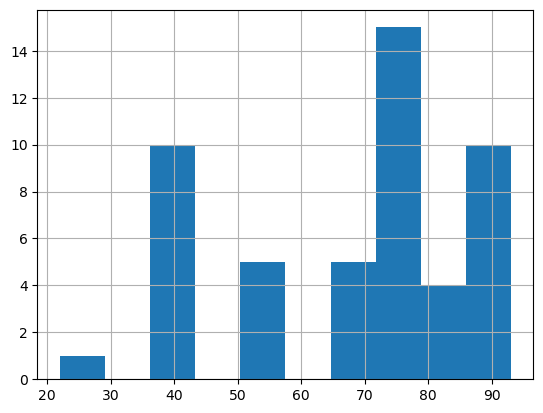

In [4]:
adjusted_prompt_df['age'].hist()

<Axes: >

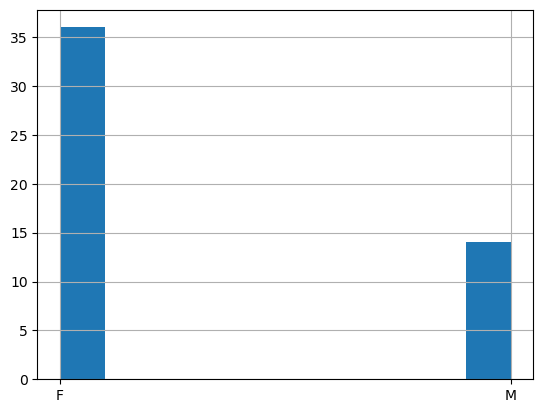

In [3]:
adjusted_prompt_df['gender'].hist()

In [4]:
identified_keywords = {  # Neo4jVector
    "boolean": [
        "anesthesia",
        "asthma",
        "asymptomatic",
        "breathing difficulty",
        "chest pain",
        "chronic obstructive pulmonary disease",
        "cough",
        "cyanosis",
        "fever",
        "pleural effusion",
        "pulmonary tuberculosis",
        "small volume linear shadows",
        "smoking"
        # Response: Risk factors for atelectasis include certain types of surgery, muscle relaxation, obesity, high oxygen, and lower lung segments.',
        # "high oxygen",  # A cause, not a symptom. Has the patient been the situation with high oxygen. # remove this for not causing confusion to LLMs.

    ],

    "numerical": [
        "heart rate (per minute)",  # "increased heart rate",
        "oxygen saturation (%)",  # "low oxygen saturation",
    ],
    # 'old age', # already provided in the report.
}

In [5]:
all_aug_keywords = identified_keywords['boolean'] + identified_keywords['numerical']

In [6]:
list(dict(mistral_df['chest pain'].value_counts()).keys())

[False, True]

In [7]:
from typing import Any
def get_same_v_cols(df: pd.DataFrame, cols_to_check: list[str])-> dict[str, Any]:
    same_v_cols = {}
    for col in cols_to_check:
        all_k = list(dict(df[col].value_counts()).keys())
        if len(all_k) == 1:
            same_v_cols[col] = all_k[0]
    return same_v_cols

In [8]:
mistral_df['Atelectasis'].value_counts()

Atelectasis
0.0    33
4.0    10
5.0     5
3.0     2
Name: count, dtype: int64

In [9]:
mistral_same_v= get_same_v_cols(mistral_df, cols_to_check=all_aug_keywords)
mistral_same_v

{'anesthesia': False,
 'asthma': False,
 'asymptomatic': True,
 'breathing difficulty': False,
 'cough': False,
 'cyanosis': False,
 'pulmonary tuberculosis': False,
 'smoking': False,
 'heart rate (per minute)': 80}

In [10]:
llama2_same_v = get_same_v_cols(llama2_df, cols_to_check=all_aug_keywords)
llama2_same_v

{'anesthesia': False,
 'asthma': False,
 'cough': False,
 'cyanosis': False,
 'pulmonary tuberculosis': False,
 'smoking': False}

In [11]:
chatgpt_same_v= get_same_v_cols(chatgpt_df, cols_to_check=all_aug_keywords)
chatgpt_same_v

{'anesthesia': False,
 'asthma': False,
 'asymptomatic': True,
 'breathing difficulty': False,
 'cough': False,
 'cyanosis': False,
 'pulmonary tuberculosis': False,
 'smoking': False,
 'heart rate (per minute)': 80}

In [12]:
neo4jvector_same_v= get_same_v_cols(neo4jvector_df, cols_to_check=all_aug_keywords)
neo4jvector_same_v

{'anesthesia': False,
 'asthma': False,
 'asymptomatic': True,
 'breathing difficulty': False,
 'cough': False,
 'cyanosis': False,
 'pulmonary tuberculosis': False,
 'small volume linear shadows': False,
 'smoking': False}

In [13]:
nopk_neo4jvector_same_v = get_same_v_cols(no_prior_knowledge_df, cols_to_check=all_aug_keywords)
nopk_neo4jvector_same_v

{'anesthesia': False,
 'asthma': False,
 'cough': False,
 'cyanosis': False,
 'pulmonary tuberculosis': False,
 'smoking': False}

In [16]:
adjusted_prompt_df_same_v = get_same_v_cols(adjusted_prompt_df, cols_to_check=all_aug_keywords)
adjusted_prompt_df_same_v

{'anesthesia': False,
 'asthma': False,
 'cough': False,
 'cyanosis': False,
 'pulmonary tuberculosis': False,
 'smoking': False}

In [18]:
# proving that they are from different df, just owing same same_v cols.
(   
    adjusted_prompt_df["oxygen saturation (%)"].mean(),
    no_prior_knowledge_df["oxygen saturation (%)"].mean(),
    neo4jvector_df["oxygen saturation (%)"].mean(),
    llama2_df["oxygen saturation (%)"].mean(),
    mistral_df["oxygen saturation (%)"].mean(),
    chatgpt_df["oxygen saturation (%)"].mean(),
)

# they have different mean value for oxygen saturation

(96.14, 96.2, 95.12, 96.44, 96.2, 95.66)

In [14]:
# TODO:
# analysis other columns, get the columns that don't have same_v

In [25]:
import seaborn as sns

In [26]:
# neo4jvector_df['has_atelectasis'] = neo4jvector_df['Atelectasis'] >0

In [27]:
neo4jvector_df["res_type"] = "Neo4jVector"
llama2_df["res_type"] = "Llama2"
mistral_df["res_type"] = "Mistral"
chatgpt_df["res_type"] = "ChatGPT"
adjusted_prompt_df ["res_type"] = "[NoPK] Neo4jVector_v2"
no_prior_knowledge_df["res_type"] = "[NoPK]Neo4jVector"

In [28]:
len(chatgpt_df)

50

In [29]:
merged_df = pd.concat([no_prior_knowledge_df, adjusted_prompt_df, neo4jvector_df, llama2_df, mistral_df, chatgpt_df],axis=0)

In [30]:
merged_df['has_atelectasis'] = merged_df['Atelectasis'] >0

In [31]:
import matplotlib.pyplot as plt

c:\Users\mike8\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mike8\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mike8\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mike8\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

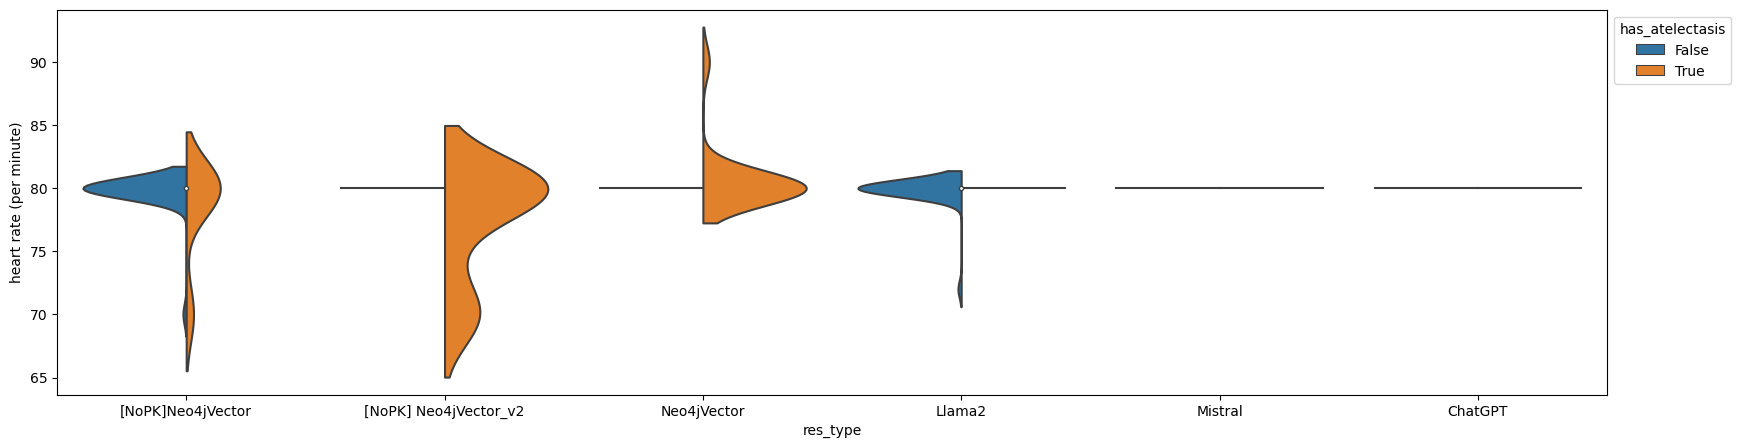

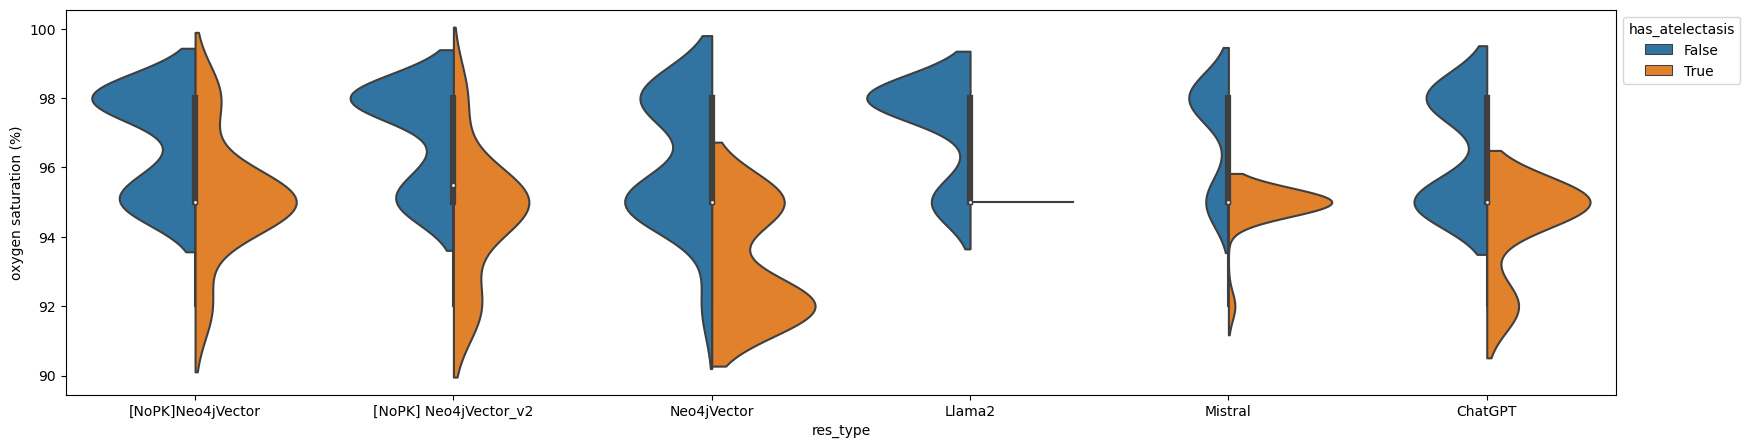

In [33]:
for col in identified_keywords['numerical']:
    plt.figure(figsize=(20,5))
    ax = sns.violinplot(data=merged_df, y=col, x="res_type", hue="has_atelectasis", split=True)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [47]:
no_prior_knowledge_df[no_prior_knowledge_df["Atelectasis"] == 0]["heart rate (per minute)"]

0     80
1     80
2     80
3     80
4     80
9     70
10    80
11    80
12    80
13    80
14    80
15    80
16    80
17    80
18    80
19    80
20    80
22    80
23    80
24    80
26    80
29    80
30    80
31    80
32    80
33    80
34    80
41    80
44    80
45    80
46    80
48    80
49    80
Name: heart rate (per minute), dtype: int64

In [23]:
# For patient with atelectasis, llama2 only has the value 95.
llama2_df[llama2_df['Atelectasis']>0]['oxygen saturation (%)']

5     95
6     95
7     95
8     95
21    95
25    95
27    95
28    95
35    95
36    95
37    95
38    95
39    95
40    95
42    95
43    95
47    95
Name: oxygen saturation (%), dtype: int64

In [38]:
import warnings
warnings.filterwarnings("ignore")

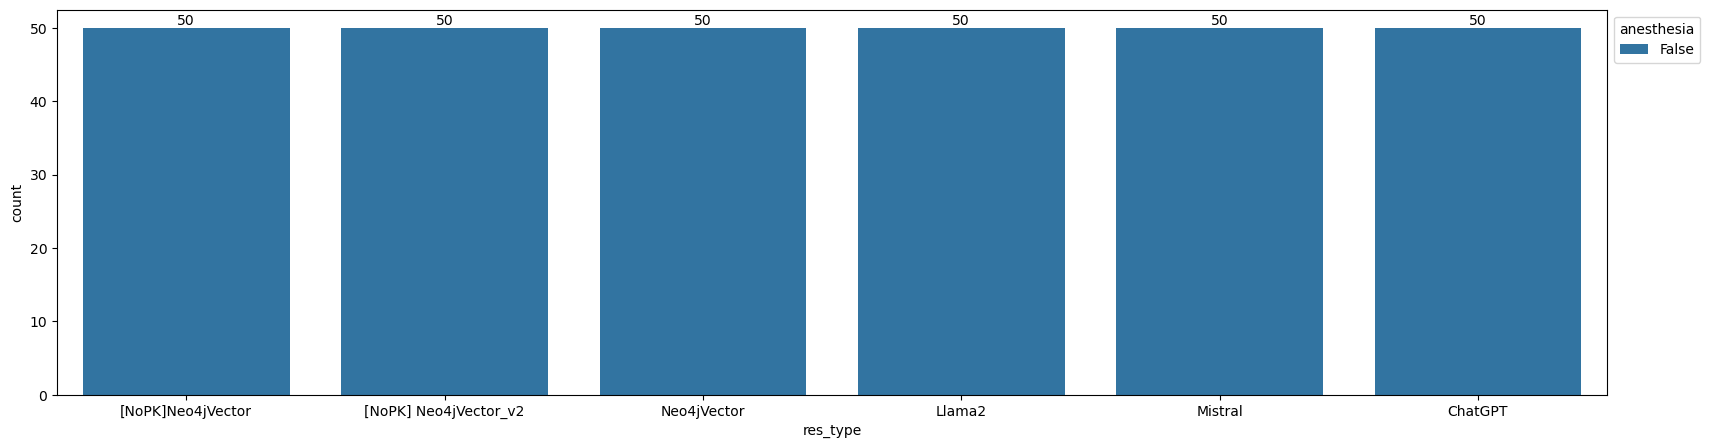

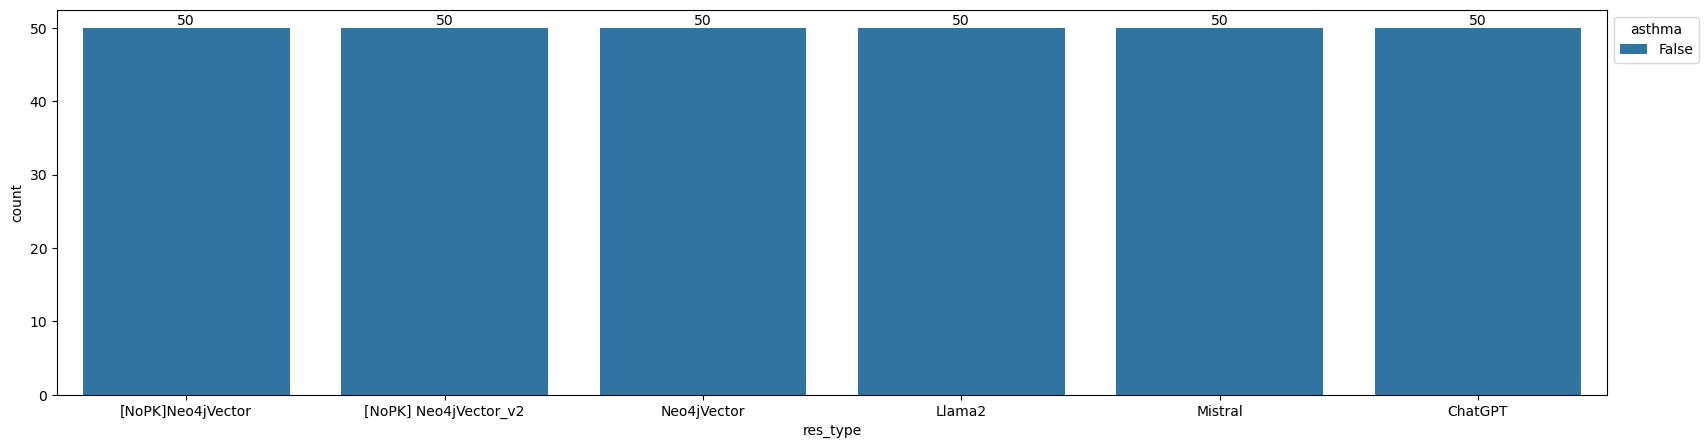

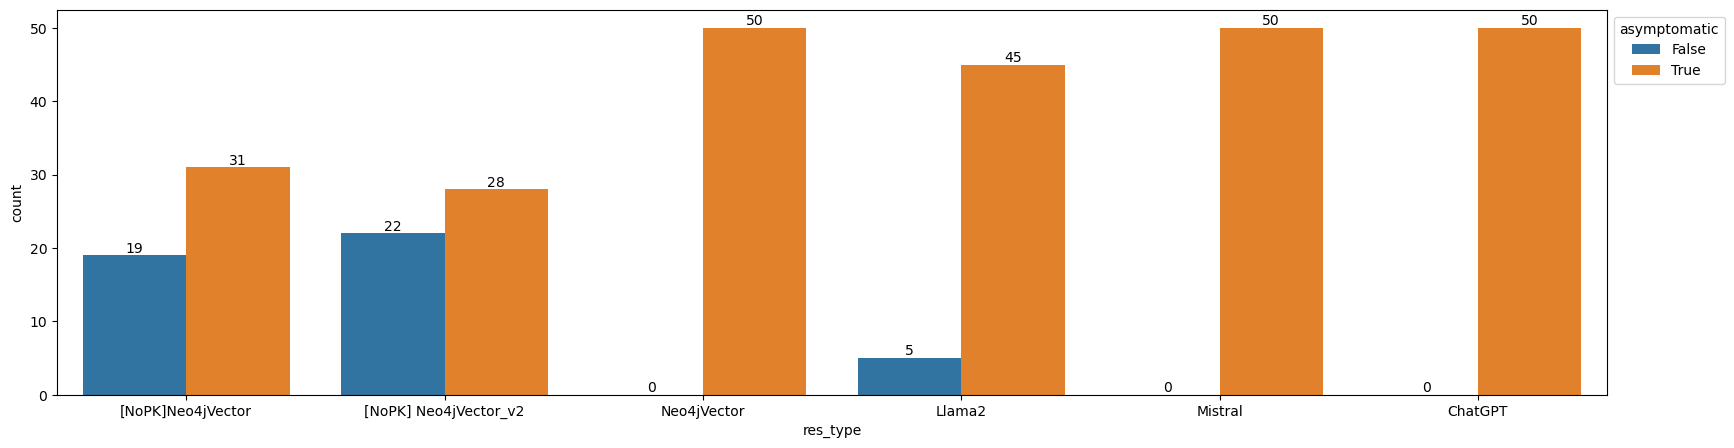

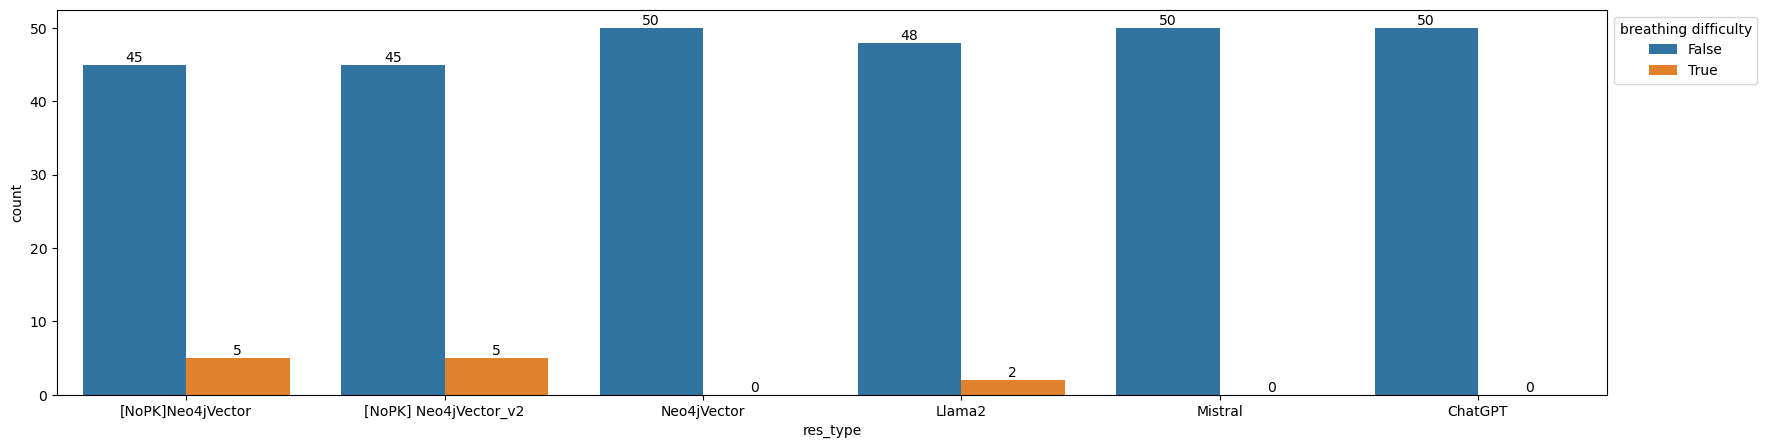

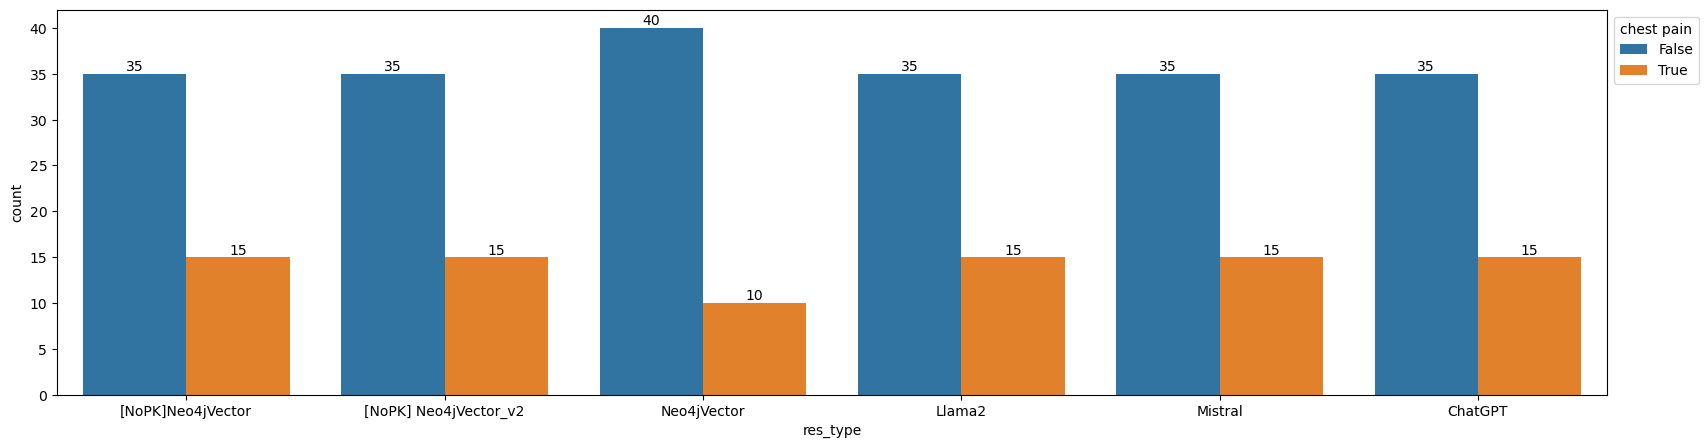

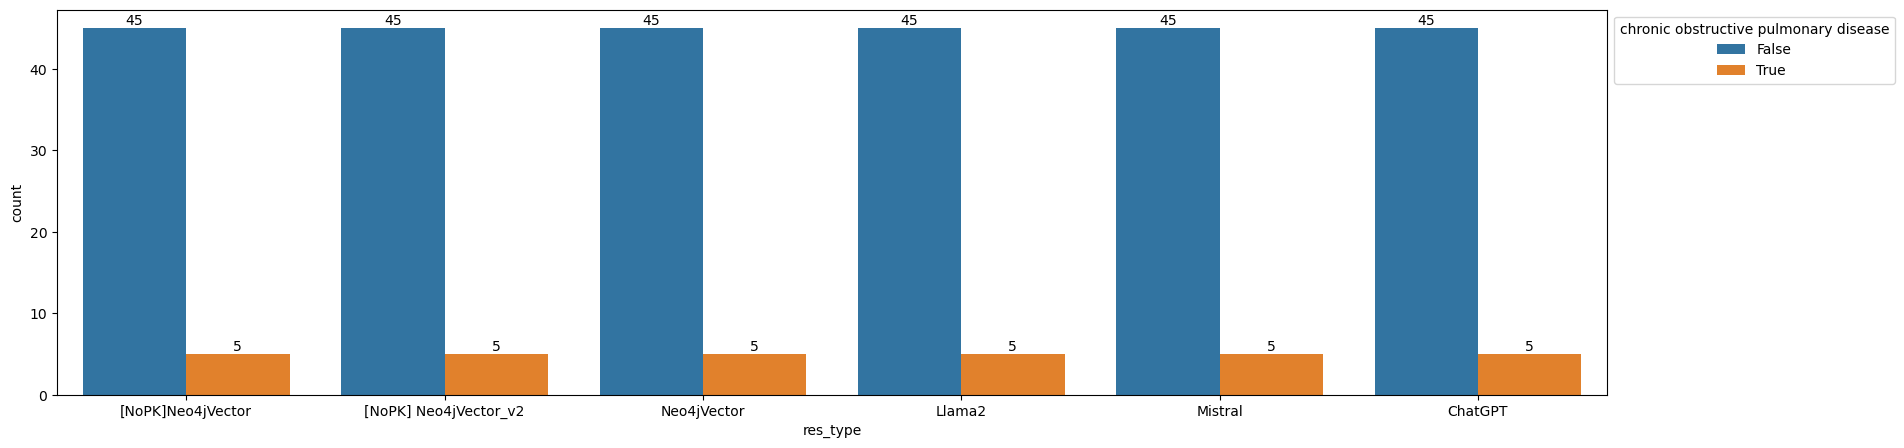

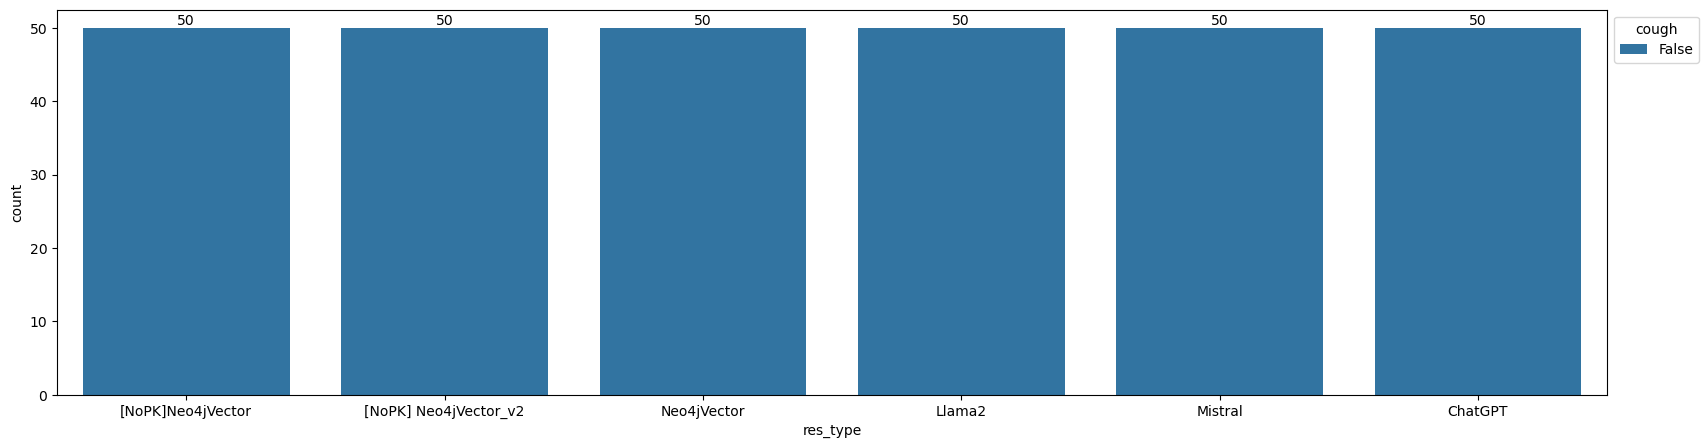

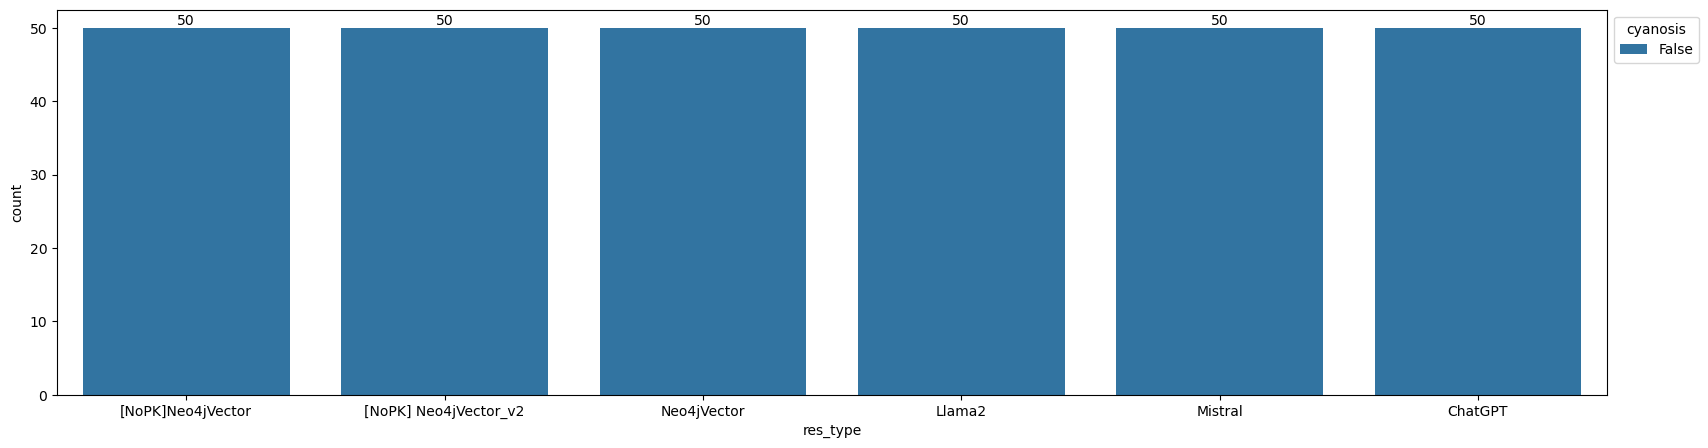

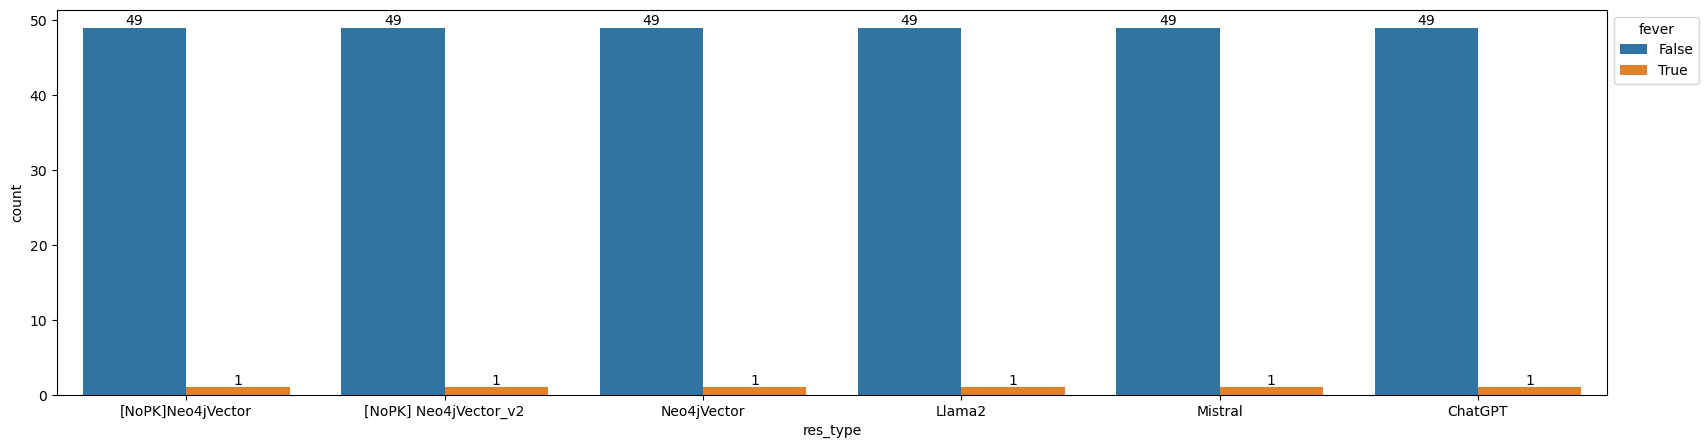

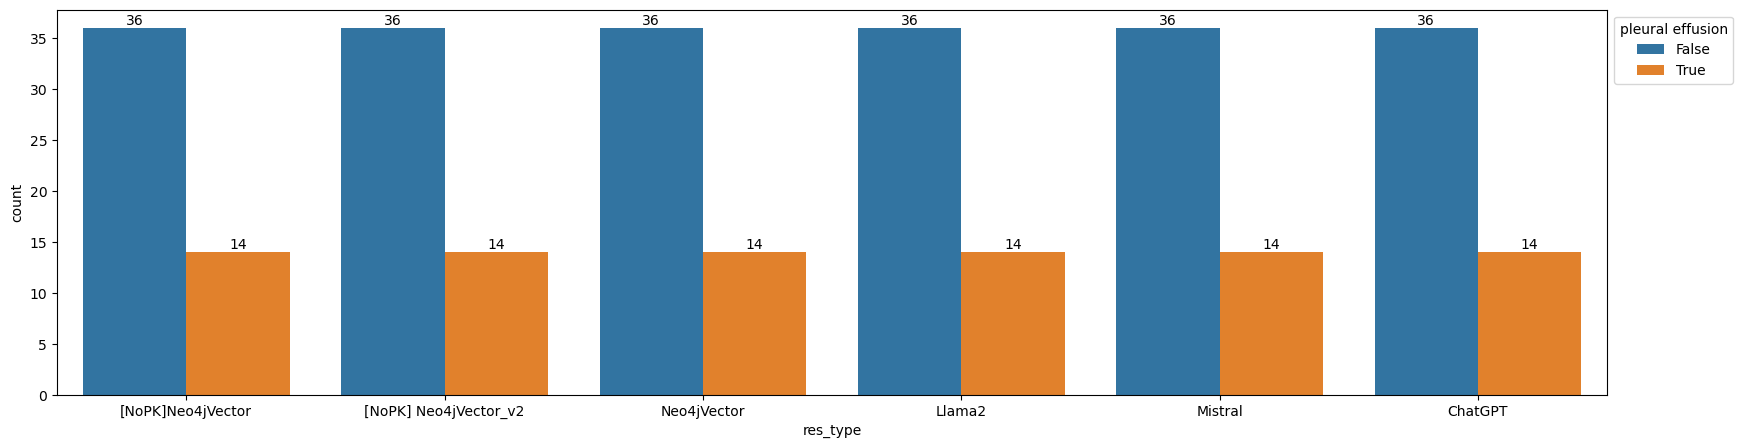

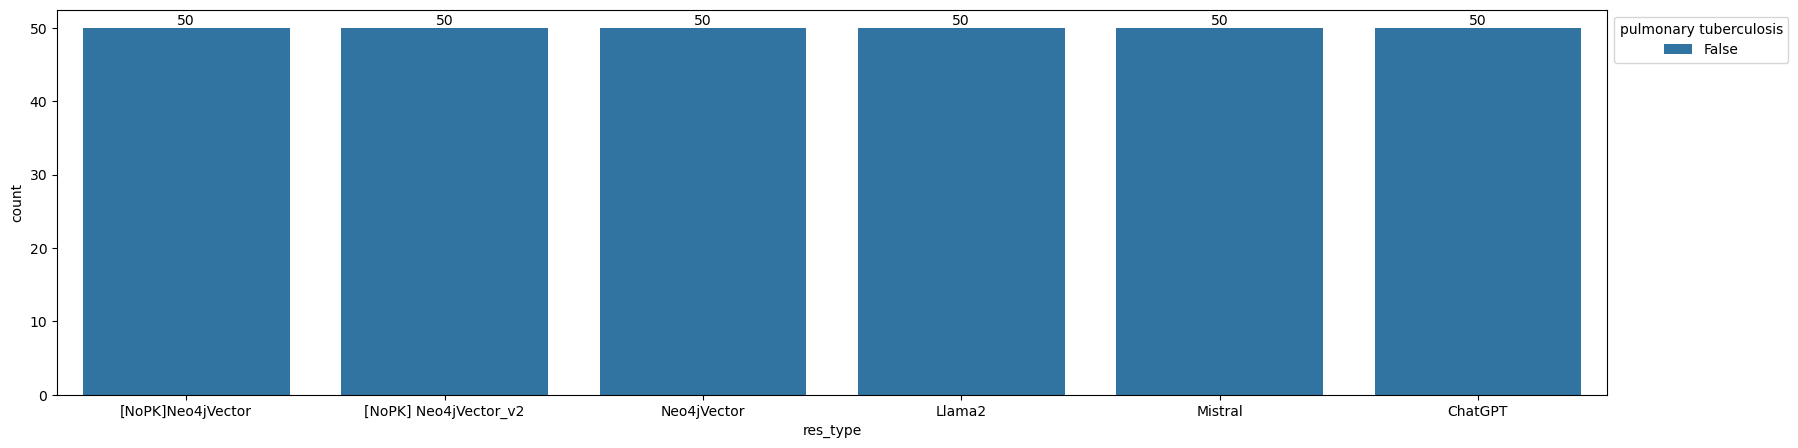

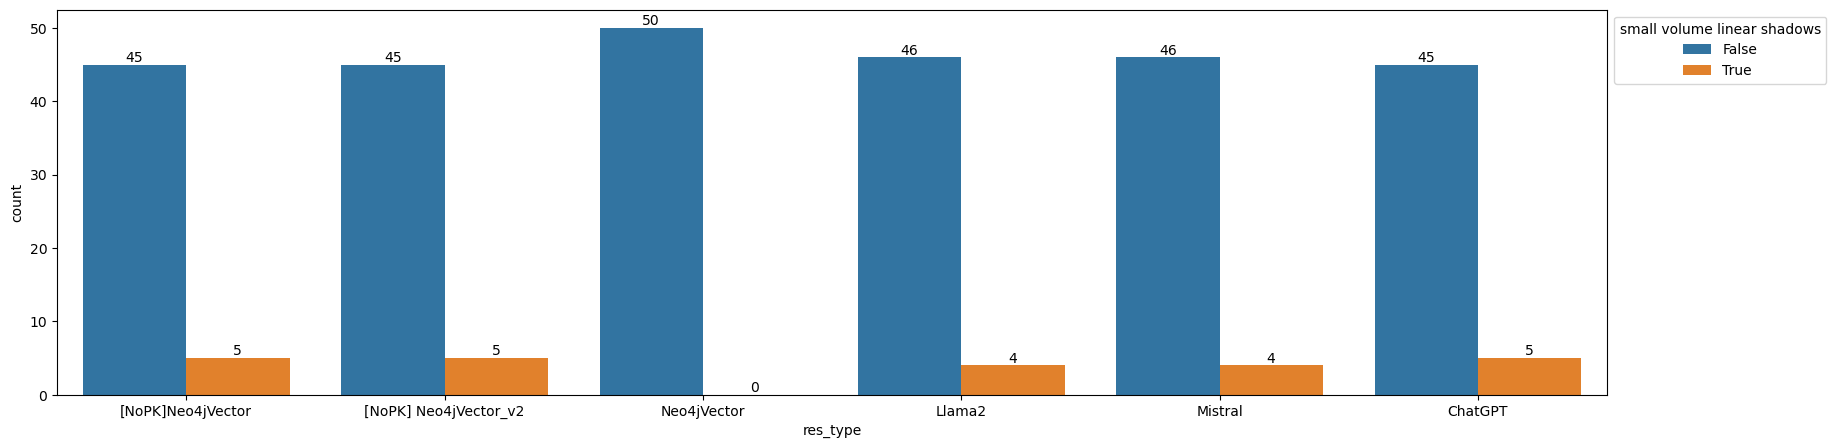

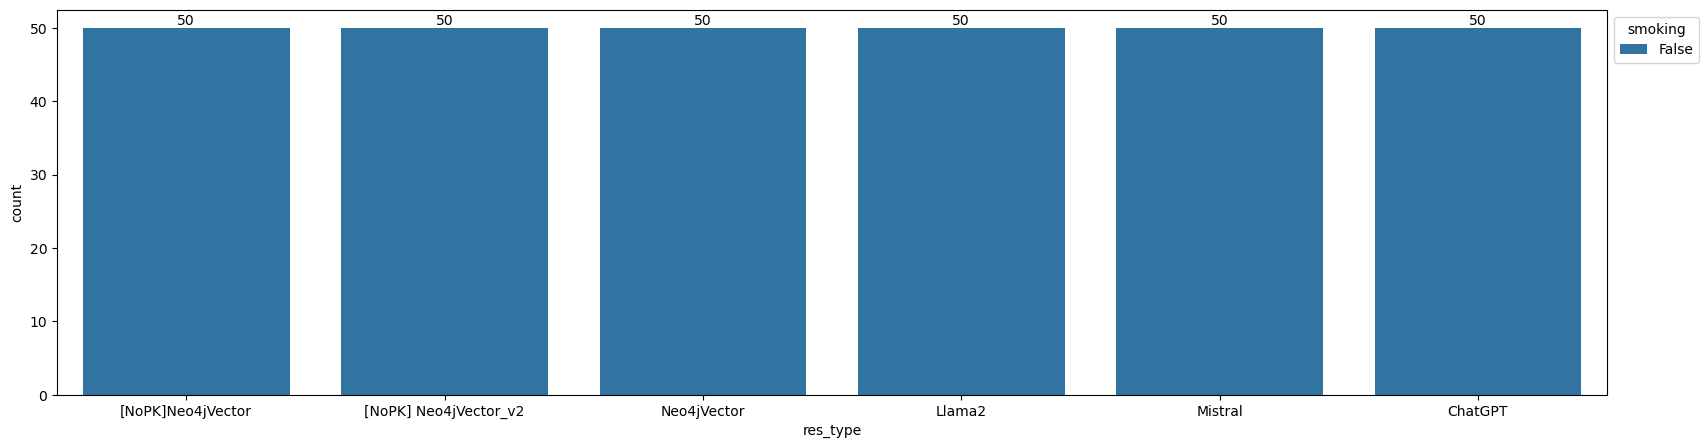

In [40]:
# check if other columns worth investigate.
# check without the prior knowledge

for col in identified_keywords['boolean']:
    plt.figure(figsize=(20,5))
    # ax = sns.violinplot(data=merged_df, y=col, x="res_type", hue="has_atelectasis")
    ax = sns.countplot(data=merged_df,  x="res_type", hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [26]:
# 'chronic obstructive pulmonary disease' has the same 5 instances across res_types

set(list(merged_df[merged_df['chronic obstructive pulmonary disease']==True]['id']))

{'P123R085394', 'P123R296943', 'P123R460441', 'P123R656082', 'P123R755677'}

In [45]:
no_prior_knowledge_df[no_prior_knowledge_df['Atelectasis'] >0]['small volume linear shadows'].sum(), neo4jvector_df[neo4jvector_df['Atelectasis']  > 0]['small volume linear shadows'].sum()

(4, 0)

In [76]:
f = "small volume linear shadows"

print(no_prior_knowledge_df[no_prior_knowledge_df['Atelectasis'] >0][f].sum(), neo4jvector_df[neo4jvector_df['Atelectasis']  > 0][f].sum())
print(no_prior_knowledge_df[no_prior_knowledge_df['Atelectasis'] ==0][f].sum(), neo4jvector_df[neo4jvector_df['Atelectasis']  == 0][f].sum())


4 0
1 0


In [1]:
adjusted_prompt_df['age']

NameError: name 'adjusted_prompt_df' is not defined

In [72]:
in_id = []
notin_id = []
for id in list(no_prior_knowledge_df[no_prior_knowledge_df['asymptomatic'] ==True]['id']) :
    if id in list(adjusted_prompt_df[adjusted_prompt_df['asymptomatic'] >0]['id']):
        in_id.append(id)
    else:
        notin_id.append(id)

In [75]:
adjusted_prompt_df[adjusted_prompt_df['id'].isin(notin_id)]['Atelectasis']

22    0.0
23    0.0
31    0.0
Name: Atelectasis, dtype: float64

In [43]:
no_prior_knowledge_df[no_prior_knowledge_df['Atelectasis'] >0]['breathing difficulty'].sum(), neo4jvector_df[neo4jvector_df['Atelectasis']  > 0]['breathing difficulty'].sum()

(0, 0)

In [44]:
no_prior_knowledge_df[no_prior_knowledge_df['Atelectasis'] == 0]['breathing difficulty'].sum(), neo4jvector_df[neo4jvector_df['Atelectasis']==0]['breathing difficulty'].sum()

(5, 0)

In [29]:
# with the prior knowledge provided.
# 1. Breathing difficulty == True increase from 45 to 50
# 2. Asymptomatic == False increase 31 to 50
# 3. 5 ,ore chest pain assigned to the patient **without** atelectasis.
# 4. 5 instances small volume linear shadow assigned to False.

## reasoning? why? we don't know why. Why cough is false in all the cases? should I alter the prompt?



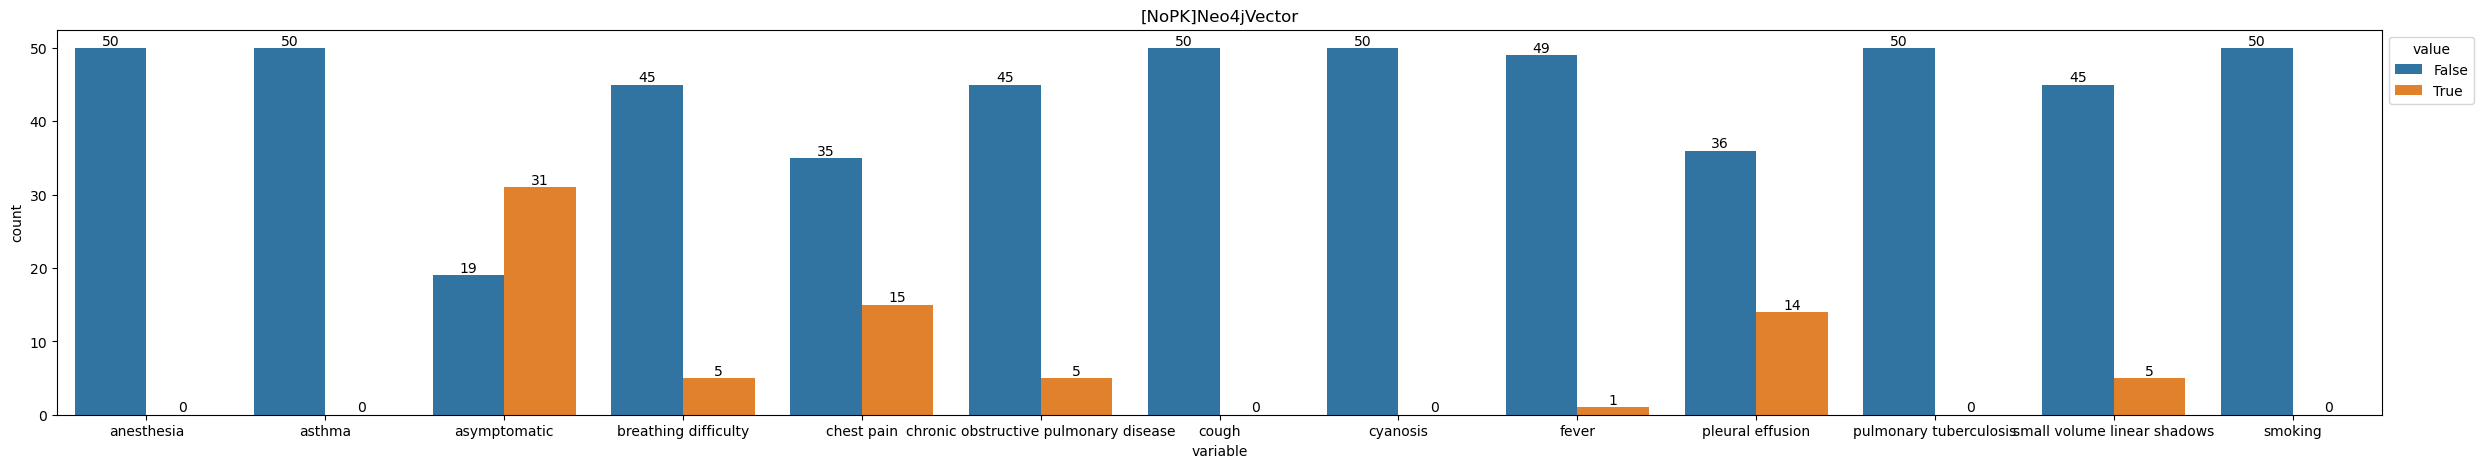

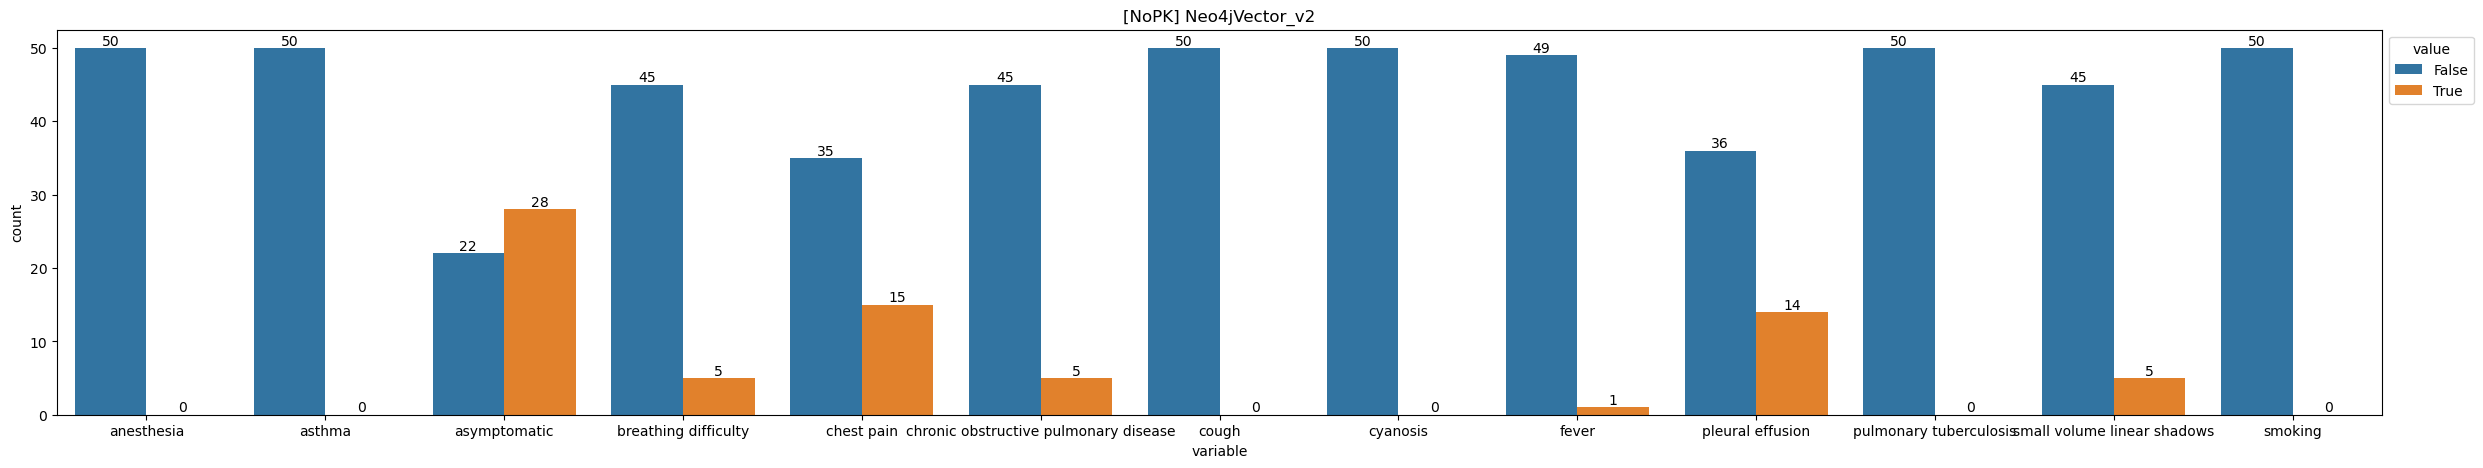

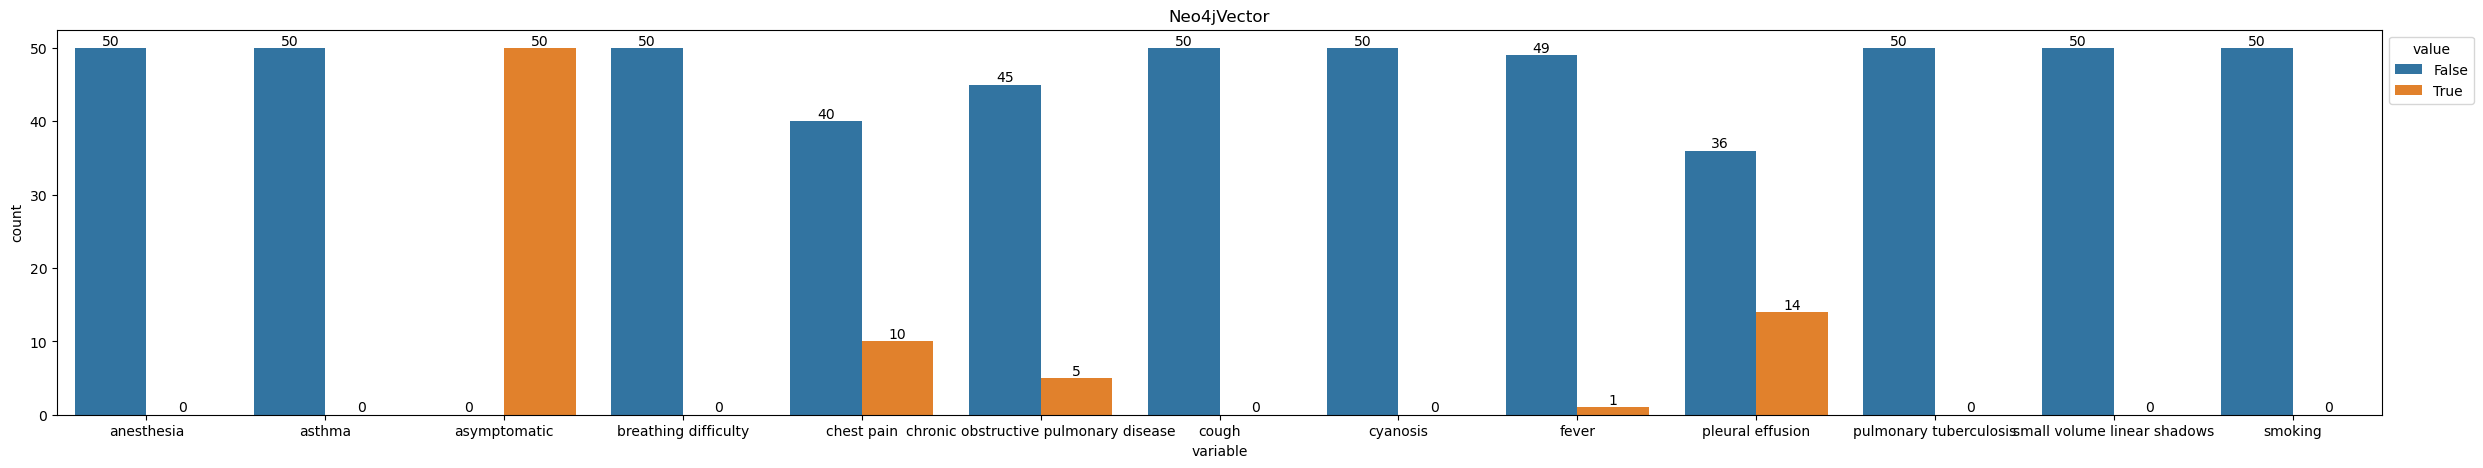

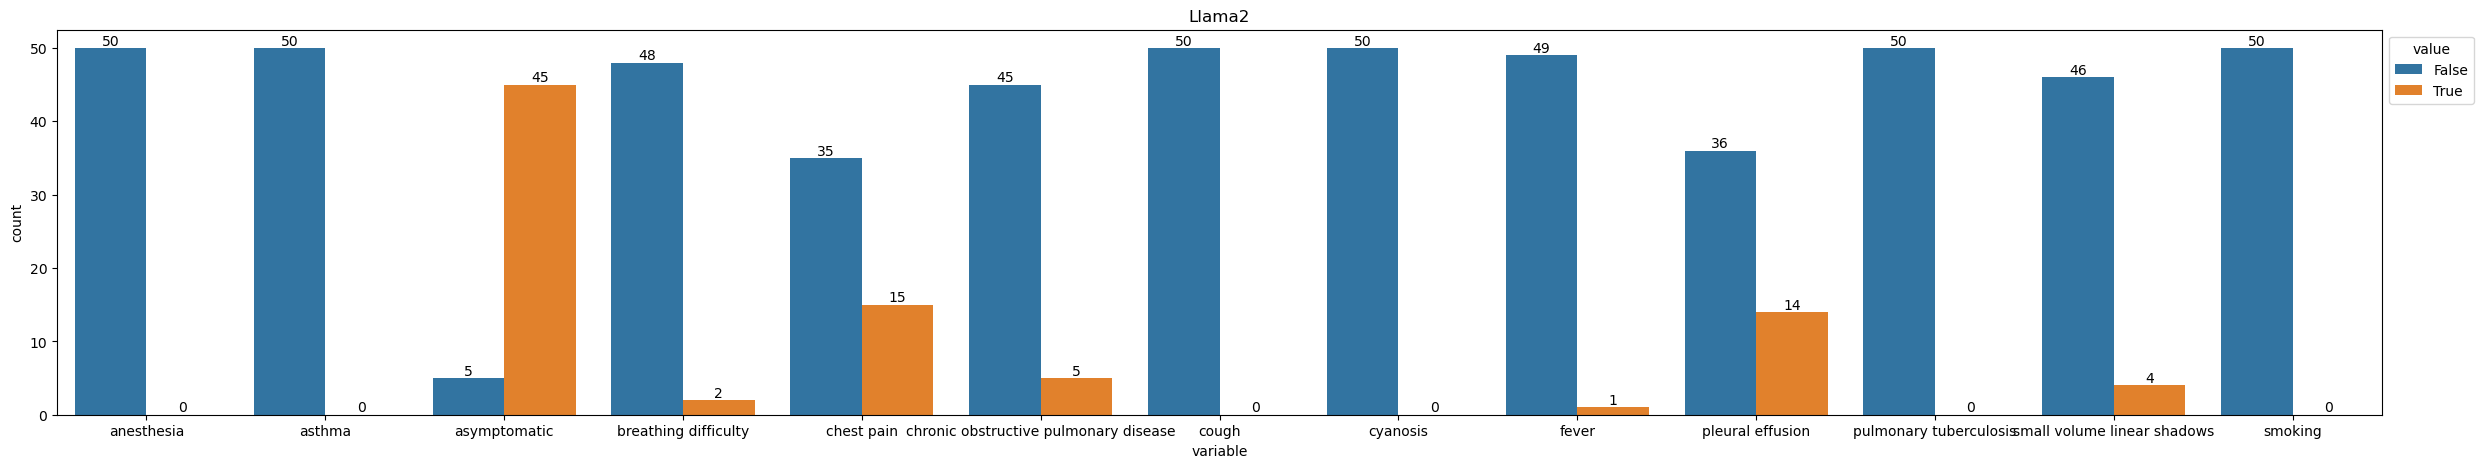

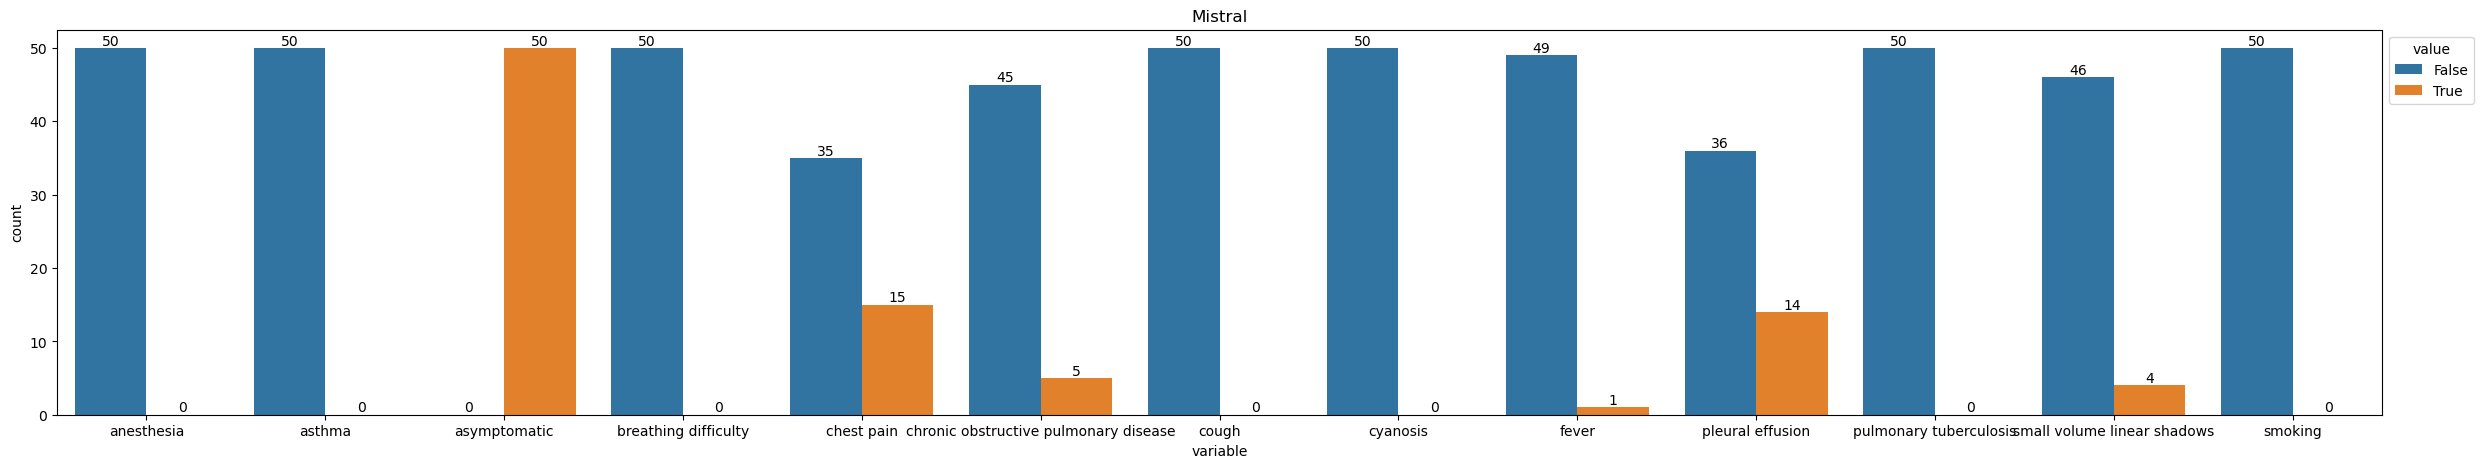

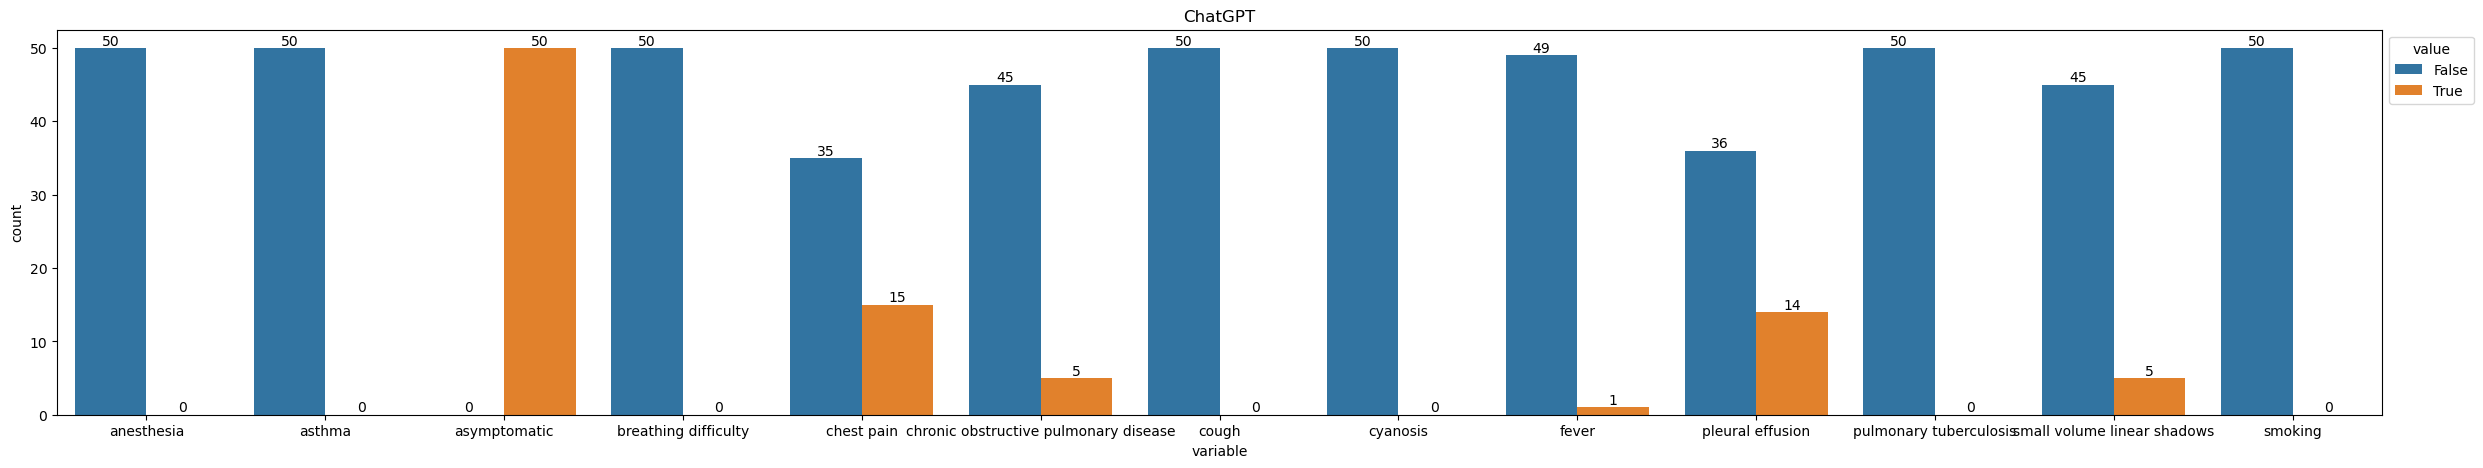

In [41]:
for res_type in list(merged_df['res_type'].value_counts().keys()):
    t_df = merged_df[merged_df['res_type'] == res_type][identified_keywords['boolean']]

    # for col in identified_keywords['boolean']:
        # plt.figure(figsize=(10,5))
        # ax = sns.violinplot(data=merged_df, y=col, x="res_type", hue="has_atelectasis")
        # ax = sns.countplot(data=merged_df,  x="res_type", hue=col)
    plt.figure(figsize=(30,5))
    ax = sns.countplot(data=pd.melt(t_df), x='variable', hue='value')
    ax.set_title(res_type)
    for container in ax.containers:
        ax.bar_label(container)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))